In [1]:
import tensorflow as tf
import json
import random
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from MonteCarloTreeSearch import MCTS


In [2]:
ExpansionModel = tf.keras.models.load_model('ExpansionModel.h5')
InscopeModel   = tf.keras.models.load_model('InscopeFilter.h5')
with open('BuildingBlocks.smi') as File:
    BuildingBlocks = [line.split()[0] for line in File]
with open('USPTO_Rule.json') as File:
    RetrosynRule   = json.load(File)

2022-03-31 12:42:30.518282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 12:42:30.521836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 12:42:30.522069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 12:42:30.522476: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [3]:
def Retrosynthesis_MCTS(TargetMolecule):
    Results, Time = MCTS(TargetMolecule, BuildingBlocks, RetrosynRule, ExpansionModel, InscopeModel).GetResults()
    display(Chem.MolFromSmiles(TargetMolecule))
    print("Time usage: {:.2f} second\n".format(Time))
    if Results:
        for i, result in enumerate(Results):
            print("Step {}\n".format(i+1))
            display(AllChem.ReactionFromSmarts(result, useSmiles=True))
    else:
        print("This molecule cannot generate synthesis plan\n")
    print('==============================================================\n')

In [4]:
Data = pd.read_csv('TargetMolecule.csv',sep='\t')
Data

,SMILES
0,O=C(C(SC(NC4=CC(Cl)=NC(C)=N4)=N3)=C3N=C2)N2C1=...
1,O=C(C(SC(NC4=NC=NC(Cl)=C4)=N3)=C3N=C2)N2C1=C(C...
2,O=C(C(SC(NC4=NN=C(Cl)C=C4)=N3)=C3N=C2)N2C1=C(C...
3,O=C(C(SC(NC4=NC=CC=C4)=N3)=C3N=C2)N2C1=C(Cl)C=...
4,O=C(C(SC(NC4=NC=NC=C4)=N3)=C3N=C2)N2C1=C(Cl)C=...
...,...
1232,O=C(NCCCC[C@H](NC(OCC1=CC=CC=C1)=O)C(NC2=CC(OC...
1233,O=C(NCCCC[C@H](NC(OCC1=CC=CC=C1)=O)C(NC2=CC(OC...
1234,O=C(NCCCC[C@H](NC(OCC1=CC=CC=C1)=O)C(NC2=CC(OC...
1235,O=C(NCCCC[C@H](NC(OCC1=CC=CC=C1)=O)C(NC2=CC(OC...


In [5]:
Data = random.choices(Data['SMILES'], k=100)
Data

['O=C(C1=CC(C2=C(Cl)C=NN2C)=C(Cl)O1)N[C@@H]3CNCC[C@H]3C4=CC=C(Cl)C=C4',
 'O=C(C1=C(O/C(C2=O)=C\\C3=CC=C(C4=NNN=N4)C=C3OC)C2=CC=C1)N',
 'O=C(NS(=O)(C1=CC=CS1)=O)C2=CC(N(C)C=C3C4=CC=C(C(F)(F)F)C=C4)=C3C=C2',
 'O=C(N)C1=C(NC2=C3CCN(C(C=C)=O)C2)N3N=C1C4=CC=C(OC5=CC=CC=C5)C=C4',
 'O=C([C@](O)(C)CN1C(C=CC=C2F)=C2CC1)NC3=CC=C(C#N)C(C(F)(F)F)=C3',
 'CC1=CC(C#N)=CC(C)=C1OC2=C(SC=C3)C3=NC(NC4CN(CC5=CC=CC(C(N)=O)=C5)C4)=N2',
 'O=C([C@](C)(O)CN1C(C=CC(F)=C2)=C2C=C1)NC3=CC=C(C#N)C(C(F)(F)F)=C3',
 'CC1=CC(C#N)=CC(C)=C1OC2=C(SC=C3)C3=NC(NC4CC5N(CC6=CC=C(S(C)(=O)=O)C=C6)C(CC5)C4)=N2',
 'ClC(C=CC=C4C)=C4N1C(C(SC(NCC3=CC=C(C)C=C3)=N2)=C2N=C1)=O',
 'O=C(N1CCN(C2CN(C(C3=CC=C(C4=CSC=C4)C(OC)=C3)=O)C2)CC1)C5=NC=CS5',
 'O=C(N)C1=C2N(C=C(N2)C3CCN(C(C=C)=O)C3)N=C1C4=CC=C(OC5=CC=CC=C5)C=C4',
 'O=C([C@](O)(C)CN1C(C=CC(F)=C2)=C2CC1)NC3=CC=C(C#N)C(Cl)=C3',
 'O=C([C@](O)(C)CN1C(C=C(C2=CC=CC=C2)C(F)=C3)=C3C=C1)NC4=CC=C(C#N)C(Cl)=C4',
 'O=C(CC1=CC=CC=C1)NC2=CNC3=NC=C(C4=CC(OC)=C(OC)C=C4)C=C32',
 'NC(C(C=C1)=CC=C1NCC2

2022-03-31 12:42:32.425601: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


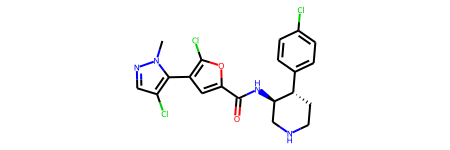

Time usage: 0.59 second

This molecule cannot generate synthesis plan




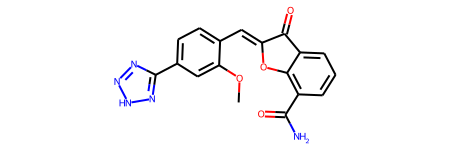

Time usage: 0.03 second

This molecule cannot generate synthesis plan




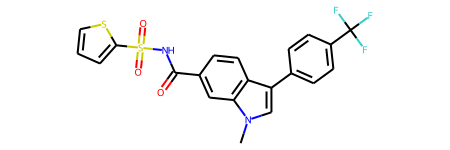

Time usage: 0.39 second

Step 1



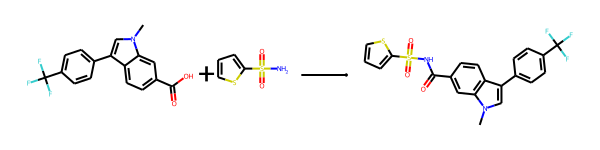

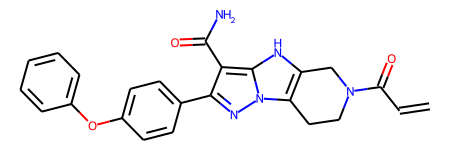

Time usage: 0.51 second

Step 1



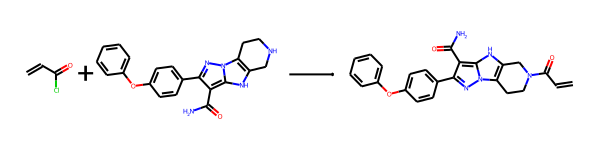

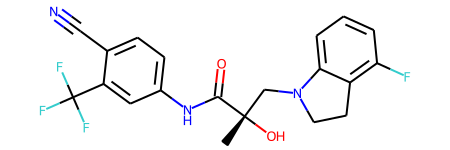

Time usage: 1.64 second

Step 1



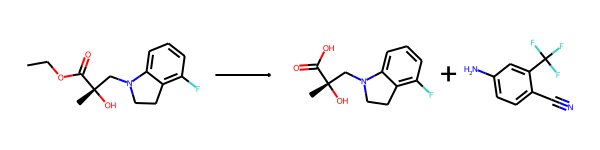

Step 2



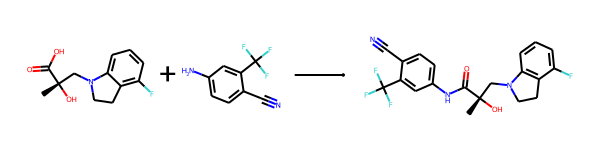

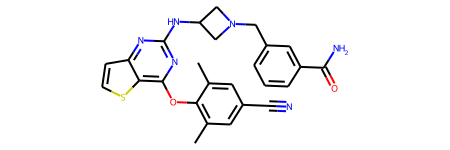

Time usage: 0.07 second

This molecule cannot generate synthesis plan




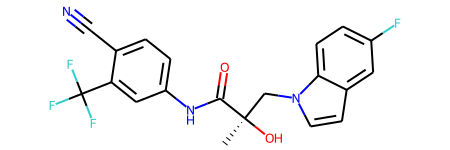

Time usage: 2.25 second

Step 1



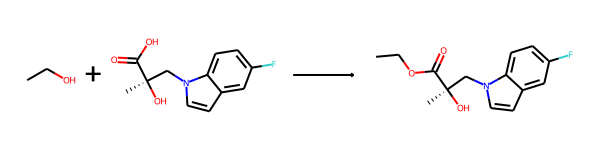

Step 2



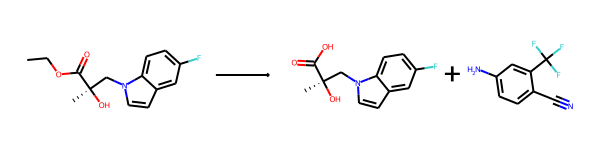

Step 3



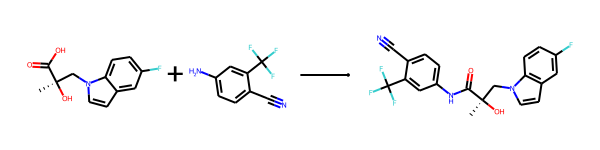

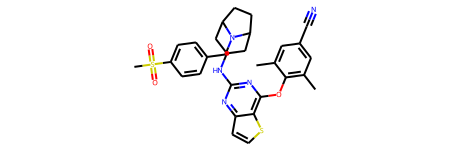

Time usage: 0.03 second

This molecule cannot generate synthesis plan




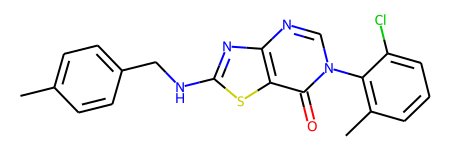

Time usage: 0.06 second

This molecule cannot generate synthesis plan




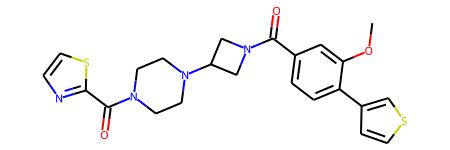

Time usage: 0.42 second

Step 1



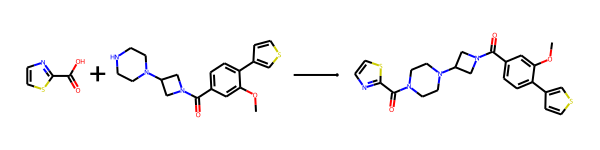

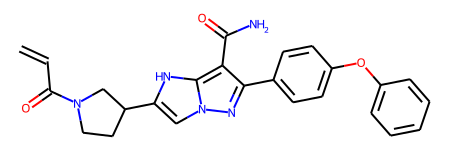

Time usage: 0.40 second

Step 1



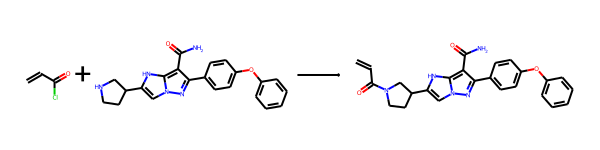

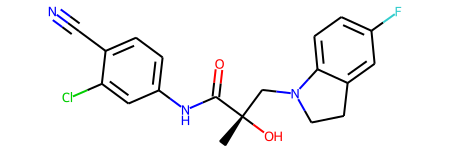

Time usage: 0.41 second

Step 1



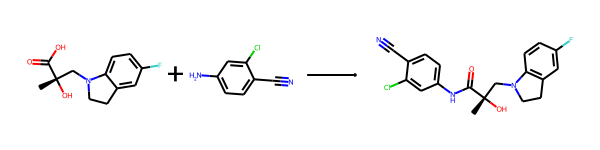

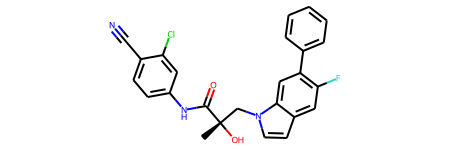

Time usage: 0.06 second

This molecule cannot generate synthesis plan




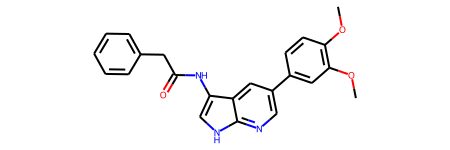

Time usage: 0.41 second

Step 1



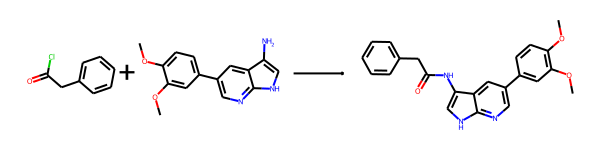

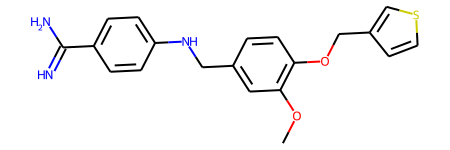

Time usage: 4.13 second

Step 1



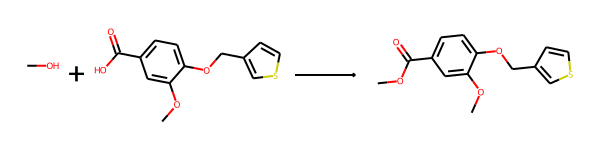

Step 2



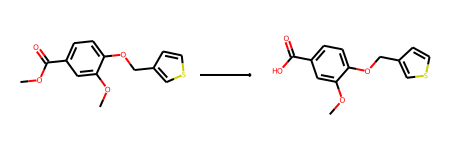

Step 3



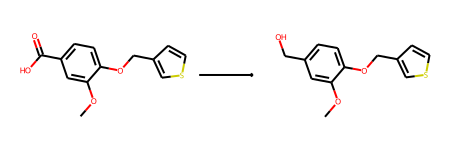

Step 4



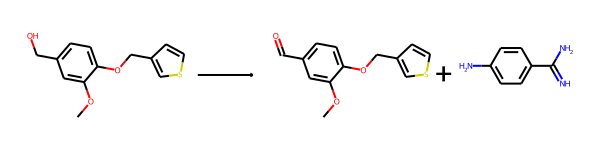

Step 5



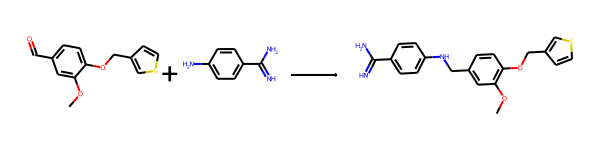

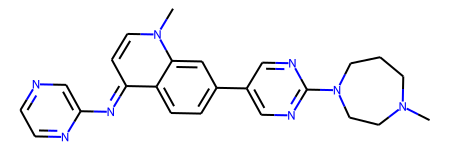

Time usage: 0.41 second

Step 1



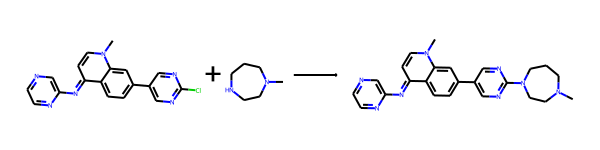

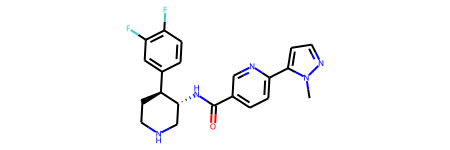

Time usage: 0.07 second

This molecule cannot generate synthesis plan




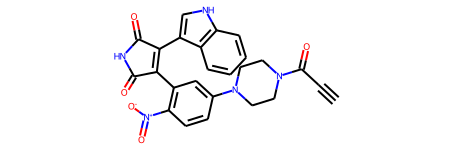

Time usage: 0.41 second

Step 1



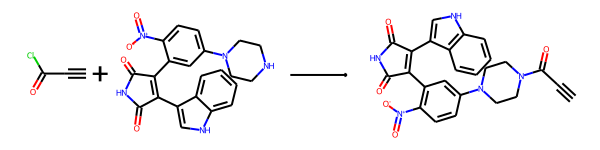

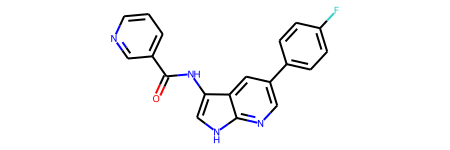

Time usage: 1.65 second

Step 1



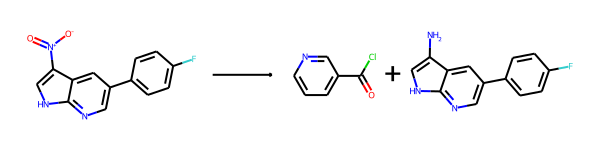

Step 2



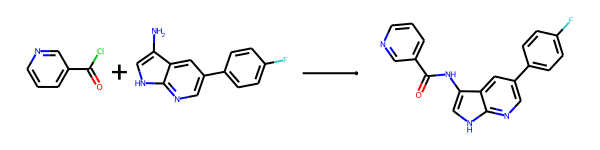

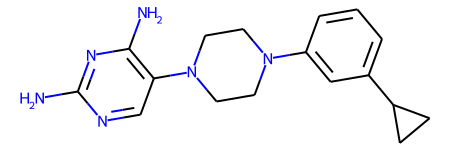

Time usage: 0.42 second

Step 1



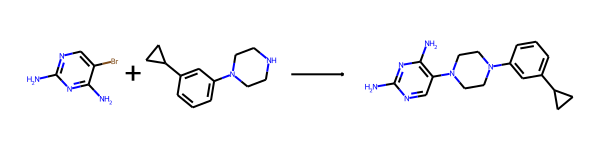

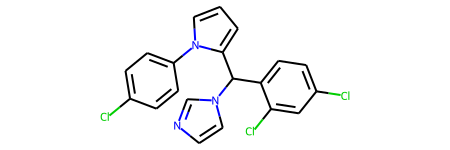

Time usage: 0.03 second

This molecule cannot generate synthesis plan




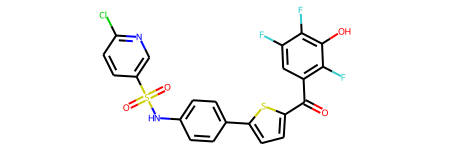

Time usage: 0.06 second

This molecule cannot generate synthesis plan




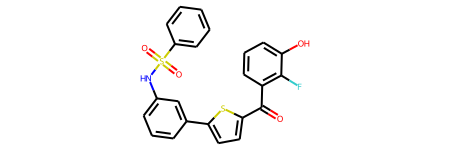

Time usage: 0.06 second

This molecule cannot generate synthesis plan




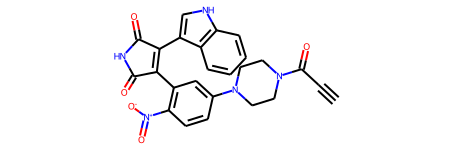

Time usage: 0.43 second

Step 1



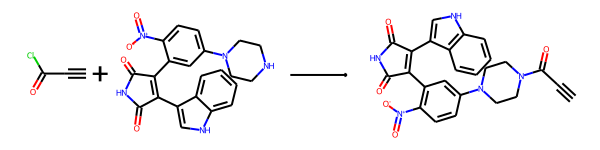

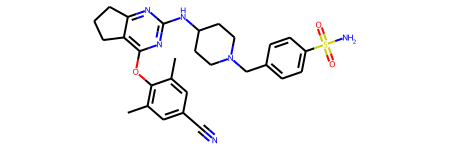

Time usage: 0.03 second

This molecule cannot generate synthesis plan




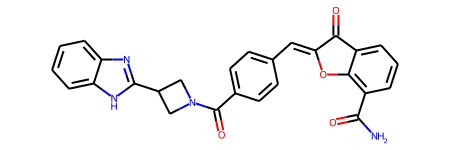

Time usage: 0.03 second

This molecule cannot generate synthesis plan




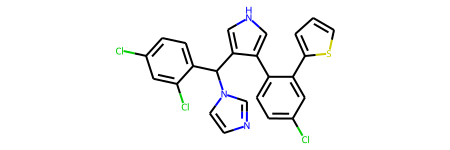

Time usage: 0.07 second

This molecule cannot generate synthesis plan




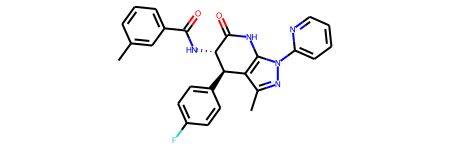

Time usage: 0.42 second

Step 1



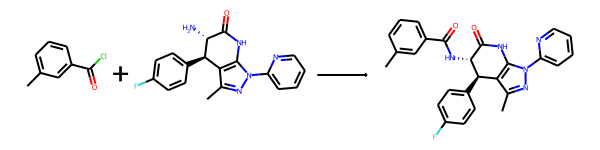

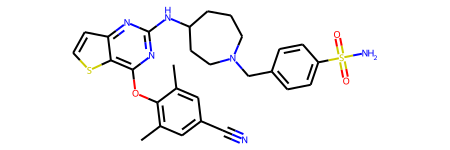

Time usage: 0.03 second

This molecule cannot generate synthesis plan




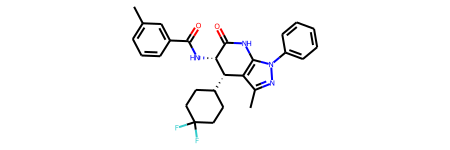

Time usage: 10.96 second

Step 1



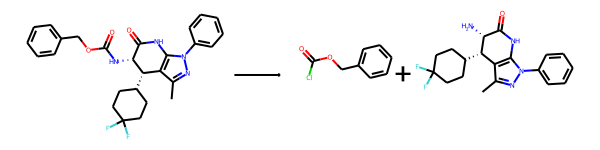

Step 2



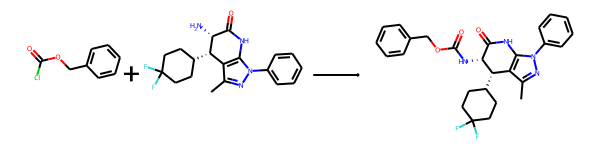

Step 3



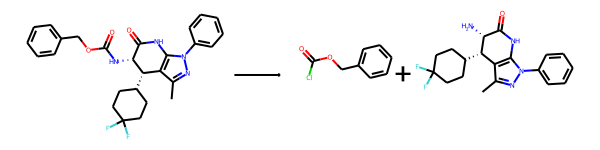

Step 4



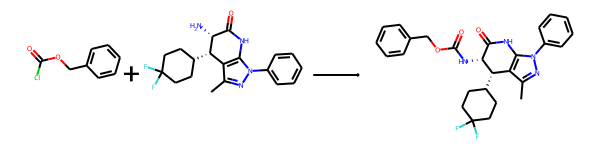

Step 5



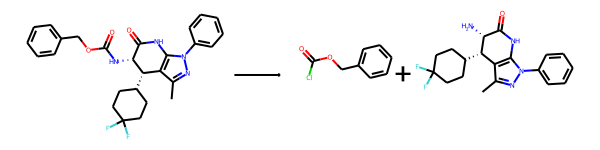

Step 6



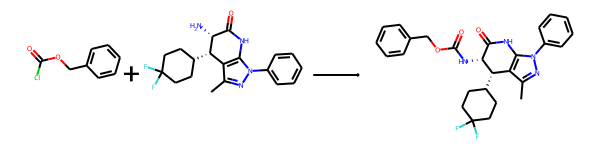

Step 7



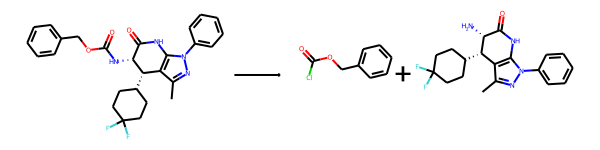

Step 8



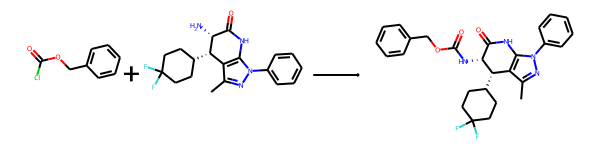

Step 9



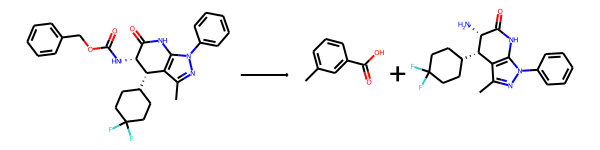

Step 10



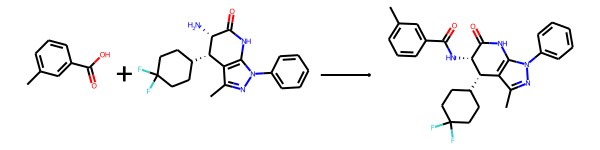

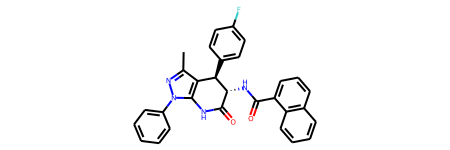

Time usage: 0.39 second

Step 1



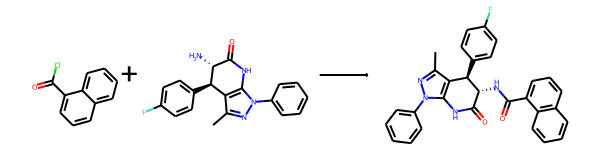

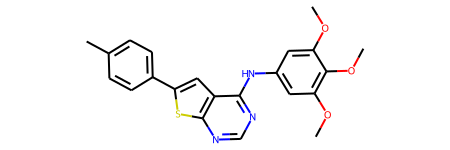

Time usage: 0.72 second

Step 1



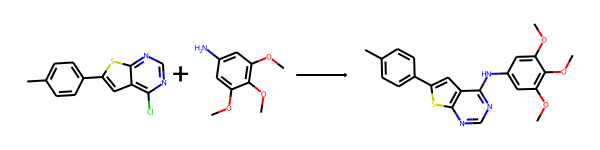

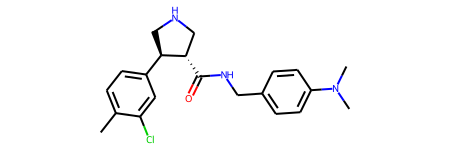

Time usage: 1.10 second

Step 1



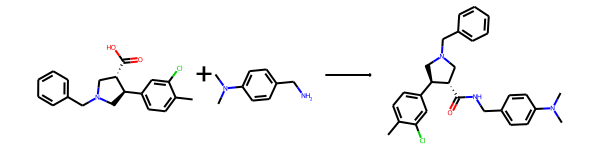

Step 2



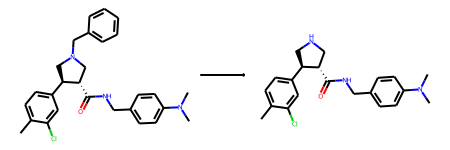

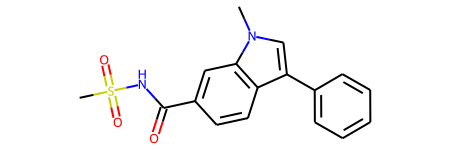

Time usage: 0.42 second

Step 1



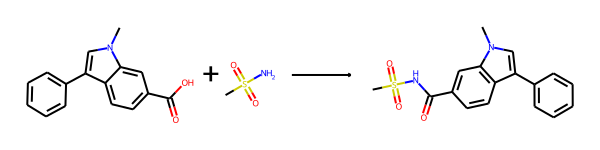

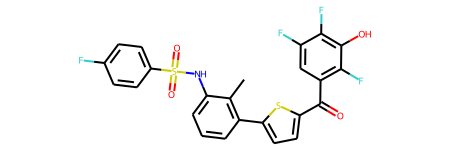

Time usage: 0.42 second

Step 1



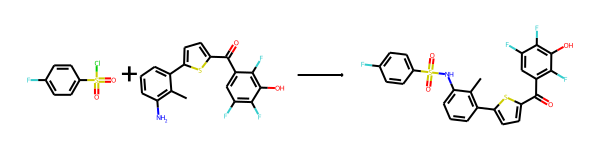

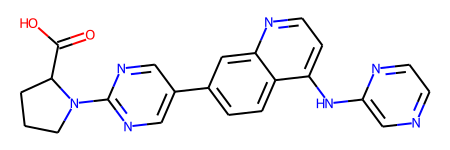

Time usage: 0.92 second

Step 1



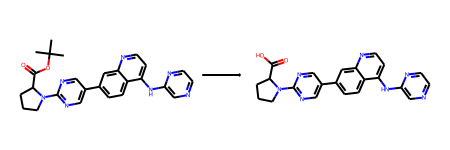

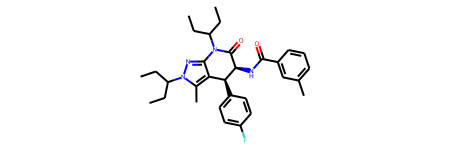

Time usage: 1.55 second

Step 1



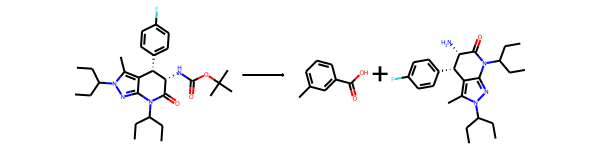

Step 2



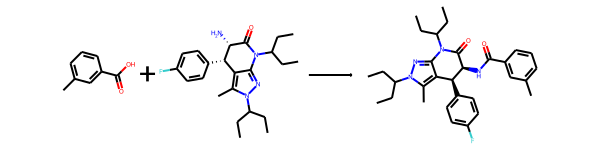

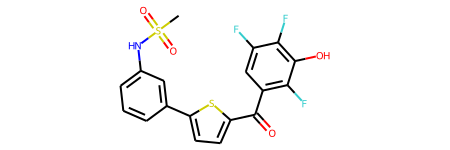

Time usage: 0.41 second

Step 1



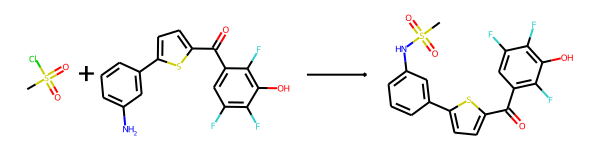

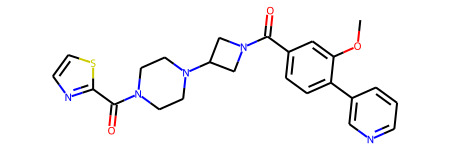

Time usage: 0.41 second

Step 1



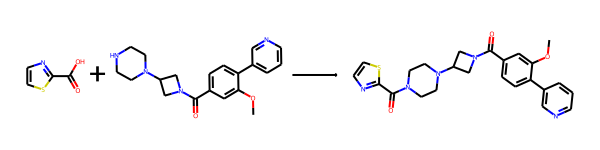

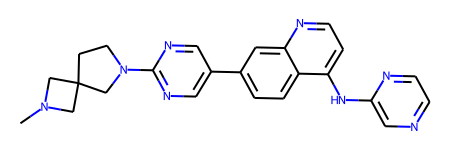

Time usage: 0.03 second

This molecule cannot generate synthesis plan




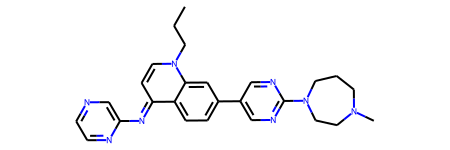

Time usage: 0.42 second

Step 1



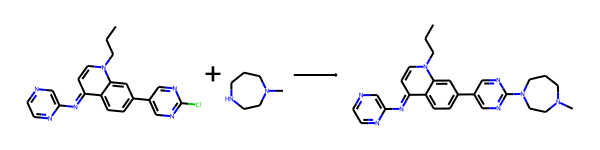

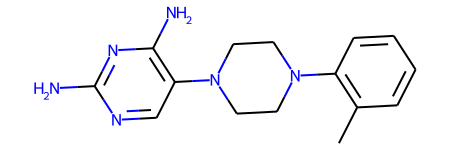

Time usage: 0.39 second

Step 1



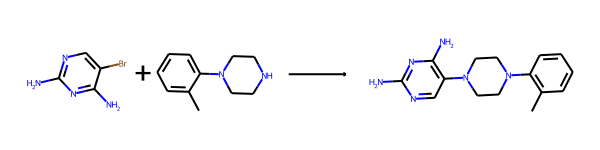

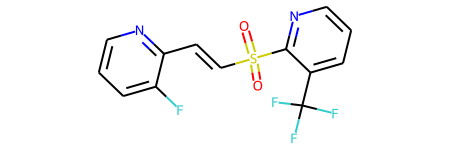

Time usage: 0.03 second

This molecule cannot generate synthesis plan




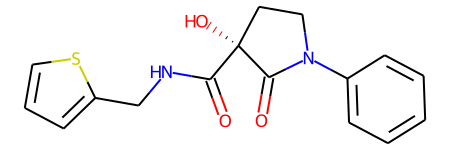

Time usage: 0.41 second

Step 1



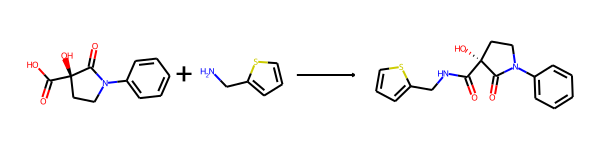

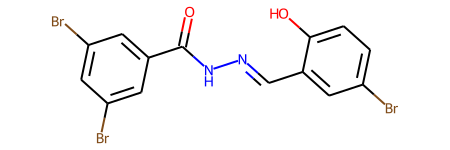

Time usage: 1.03 second

Step 1



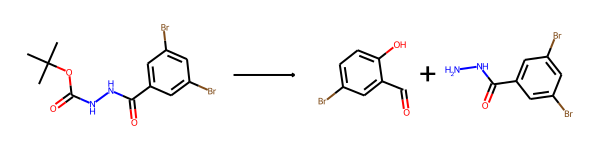

Step 2



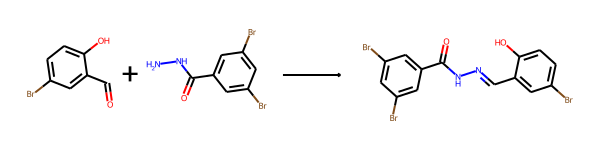

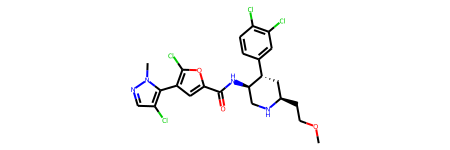

Time usage: 0.06 second

This molecule cannot generate synthesis plan




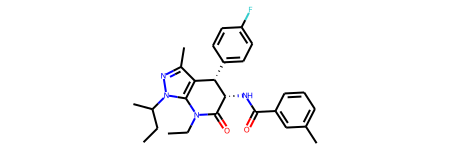

Time usage: 1.50 second

Step 1



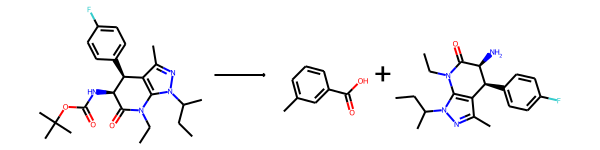

Step 2



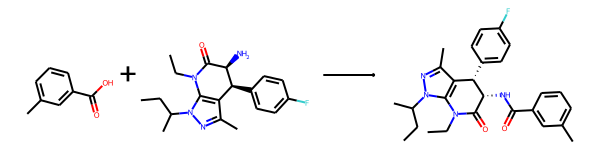

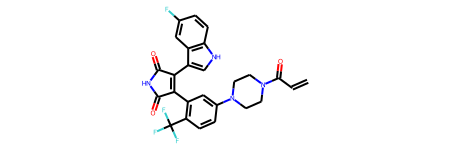

Time usage: 0.43 second

Step 1



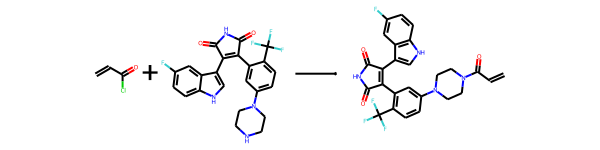

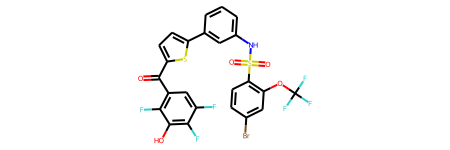

Time usage: 0.40 second

Step 1



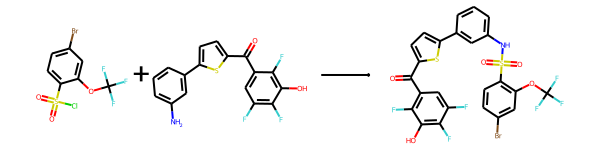

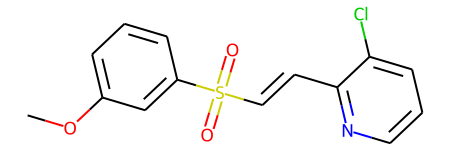

Time usage: 0.03 second

This molecule cannot generate synthesis plan




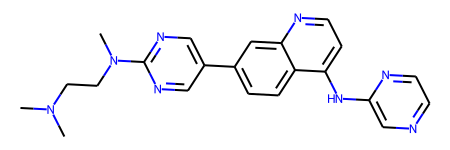

Time usage: 0.06 second

This molecule cannot generate synthesis plan




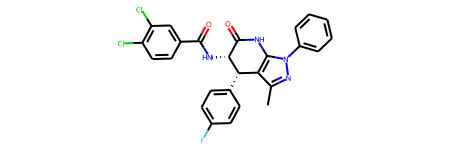

Time usage: 0.41 second

Step 1



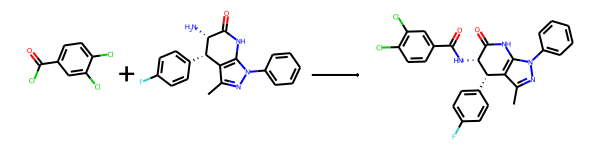

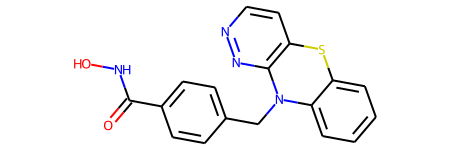

Time usage: 0.40 second

Step 1



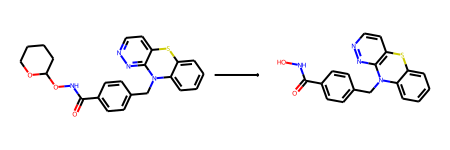

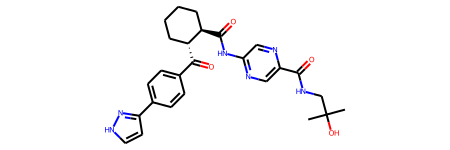

Time usage: 0.04 second

This molecule cannot generate synthesis plan




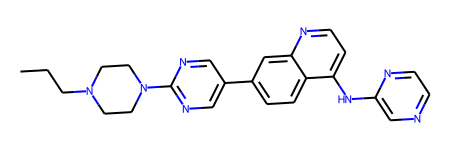

Time usage: 0.42 second

Step 1



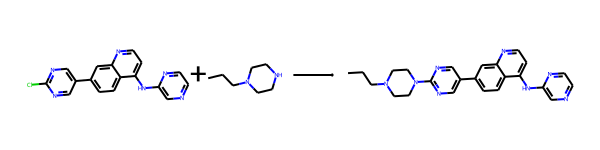

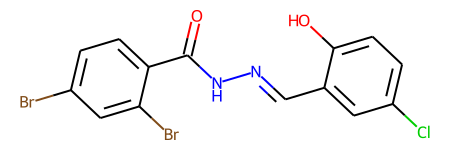

Time usage: 0.40 second

Step 1



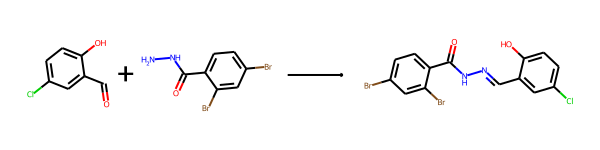

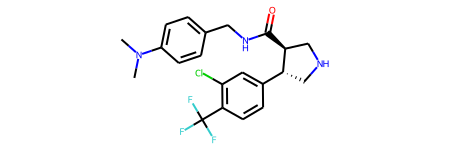

Time usage: 0.06 second

This molecule cannot generate synthesis plan




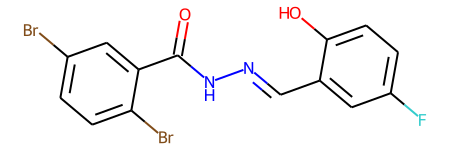

Time usage: 0.40 second

Step 1



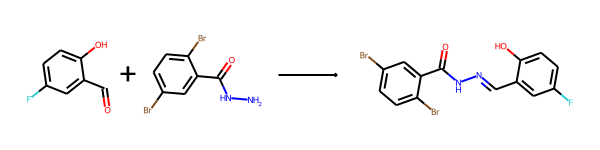

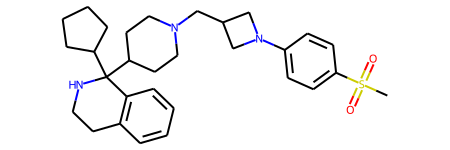

Time usage: 0.06 second

This molecule cannot generate synthesis plan




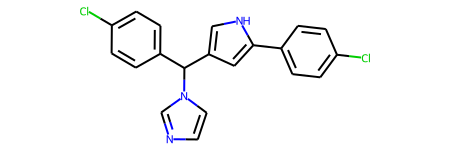

Time usage: 0.03 second

This molecule cannot generate synthesis plan




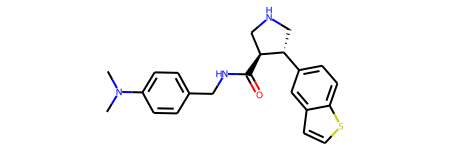

Time usage: 0.03 second

This molecule cannot generate synthesis plan




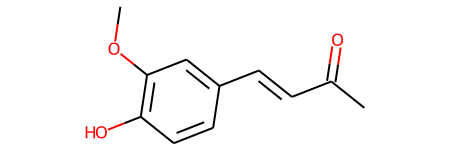

Time usage: 1.08 second

Step 1



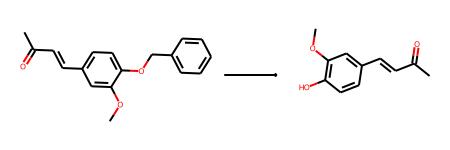

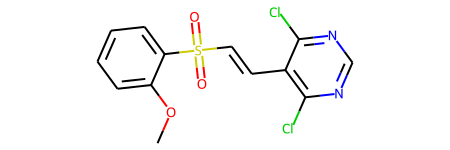

Time usage: 0.03 second

This molecule cannot generate synthesis plan




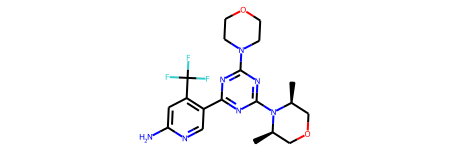

Time usage: 0.06 second

This molecule cannot generate synthesis plan




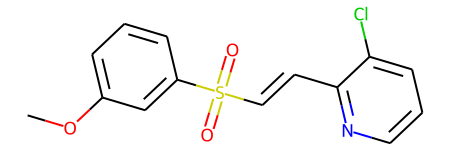

Time usage: 0.03 second

This molecule cannot generate synthesis plan




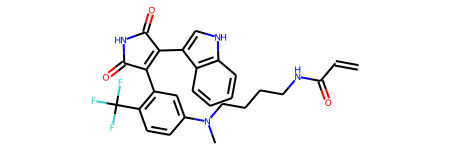

Time usage: 0.41 second

Step 1



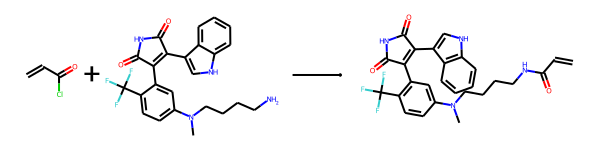

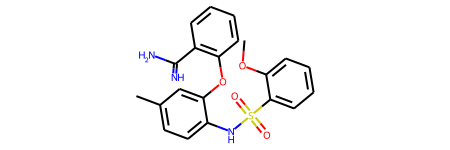

Time usage: 0.40 second

Step 1



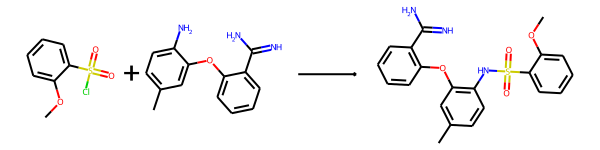

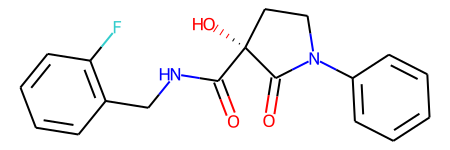

Time usage: 0.41 second

Step 1



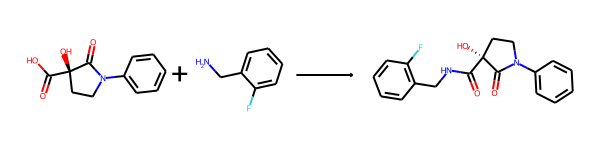

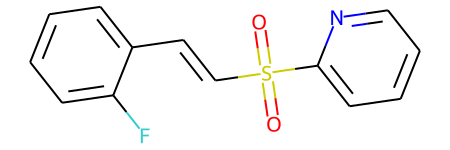

Time usage: 0.06 second

This molecule cannot generate synthesis plan




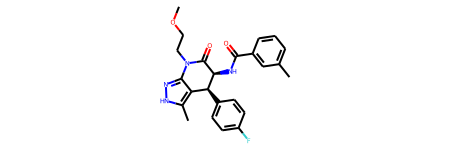

Time usage: 0.03 second

This molecule cannot generate synthesis plan




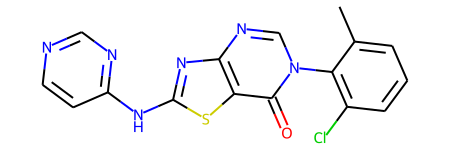

Time usage: 0.03 second

This molecule cannot generate synthesis plan




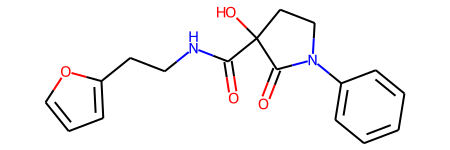

Time usage: 0.41 second

Step 1



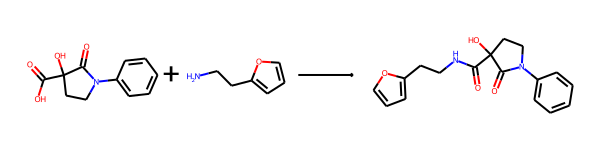

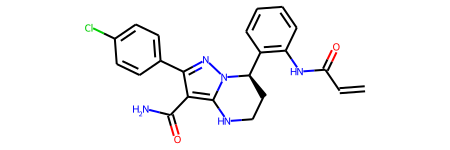

Time usage: 0.43 second

Step 1



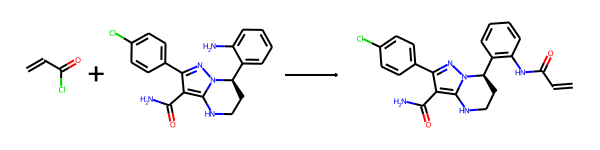

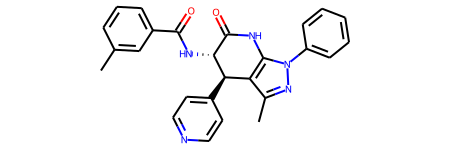

Time usage: 0.41 second

Step 1



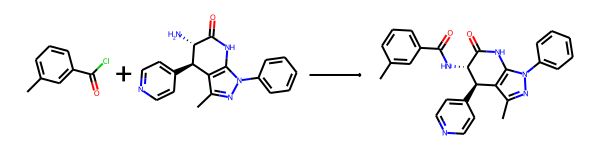

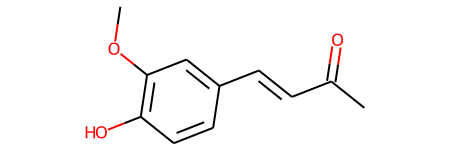

Time usage: 1.19 second

Step 1



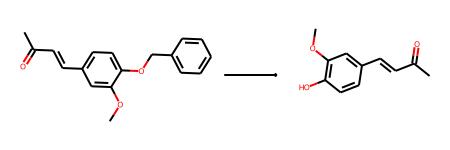

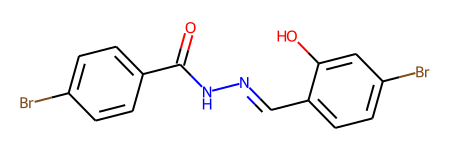

Time usage: 1.07 second

Step 1



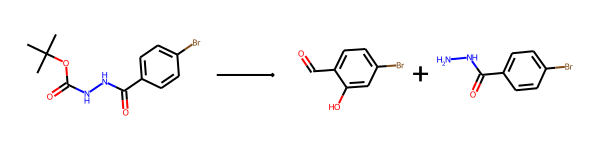

Step 2



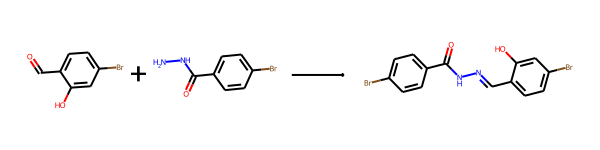

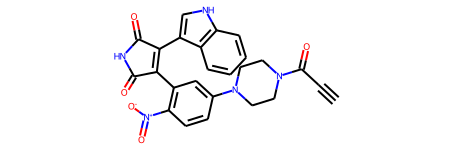

Time usage: 0.41 second

Step 1



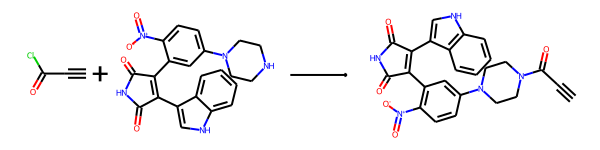

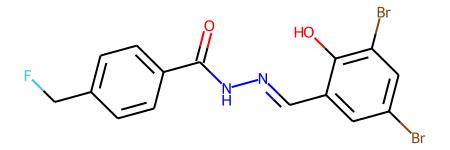

Time usage: 0.03 second

This molecule cannot generate synthesis plan




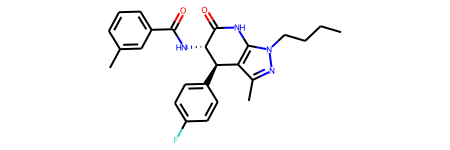

Time usage: 0.56 second

Step 1



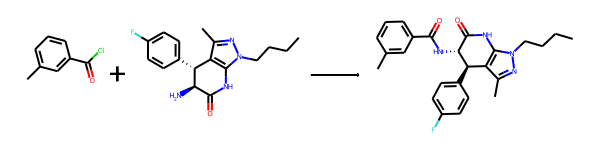

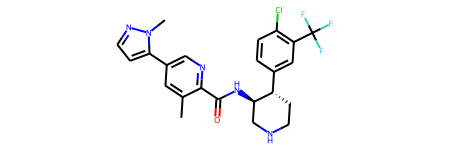

Time usage: 1.77 second

Step 1



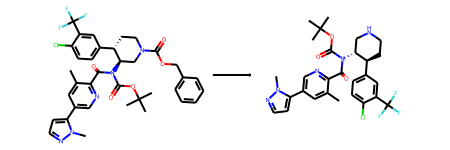

Step 2



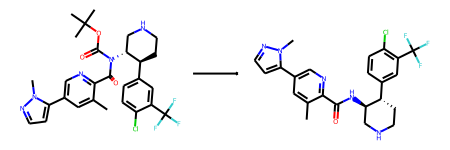

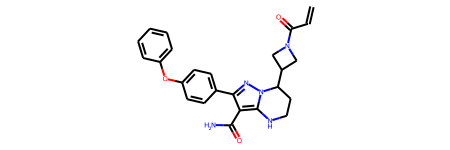

Time usage: 0.43 second

Step 1



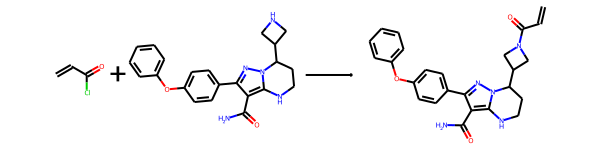

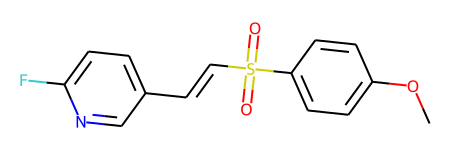

Time usage: 0.03 second

This molecule cannot generate synthesis plan




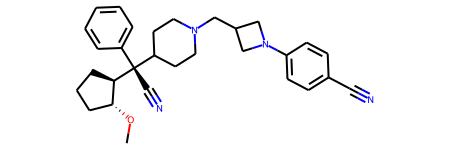

Time usage: 0.06 second

This molecule cannot generate synthesis plan




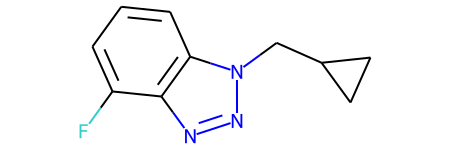

Time usage: 0.03 second

This molecule cannot generate synthesis plan




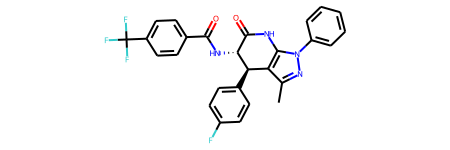

Time usage: 0.42 second

Step 1



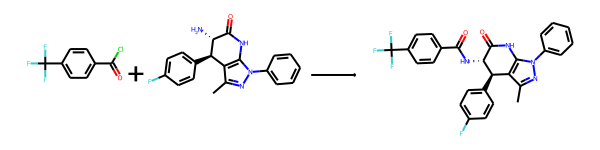

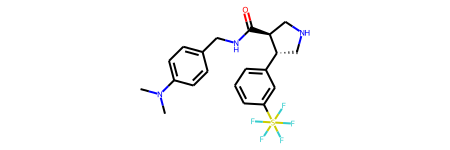

Time usage: 0.07 second

This molecule cannot generate synthesis plan




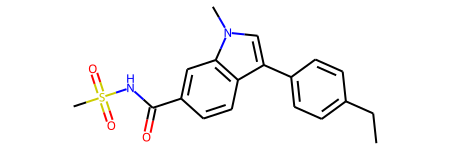

Time usage: 0.41 second

Step 1



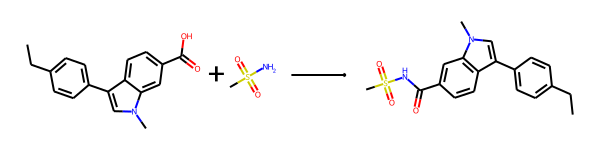

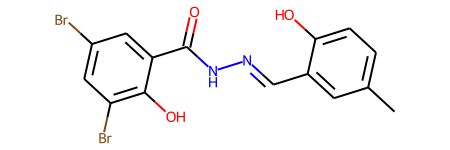

Time usage: 0.41 second

Step 1



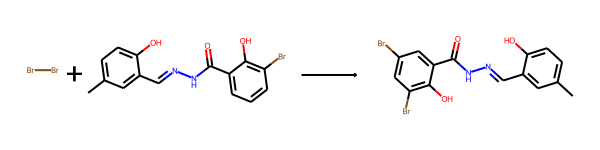

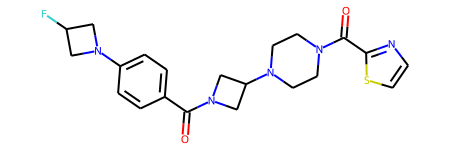

Time usage: 0.41 second

Step 1



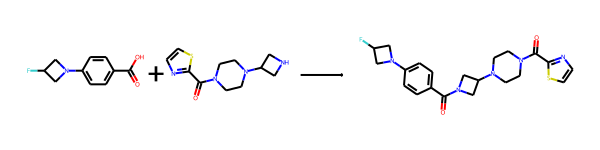

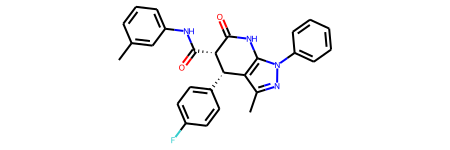

Time usage: 0.40 second

Step 1



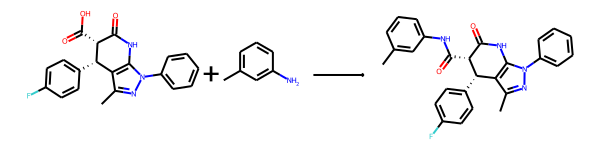

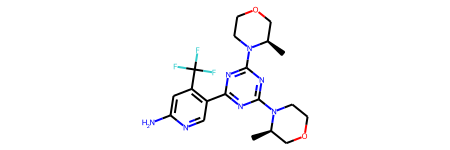

Time usage: 0.06 second

This molecule cannot generate synthesis plan




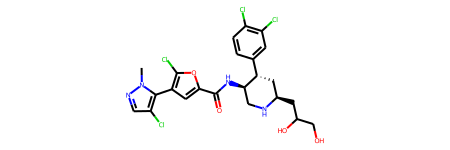

Time usage: 0.06 second

This molecule cannot generate synthesis plan




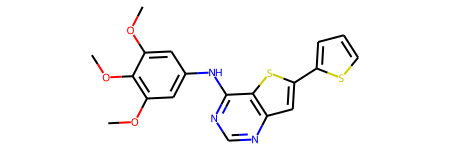

Time usage: 1.00 second

Step 1



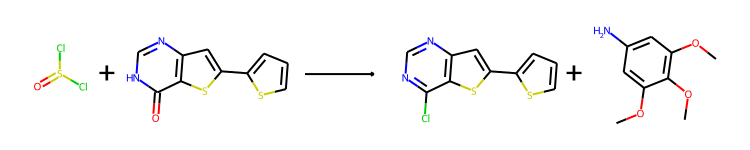

Step 2



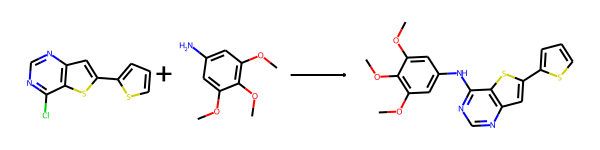

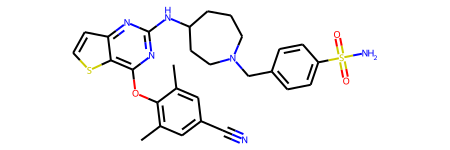

Time usage: 0.03 second

This molecule cannot generate synthesis plan




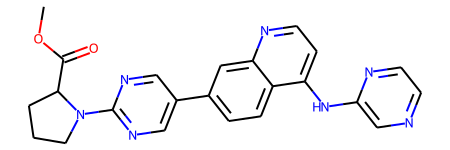

Time usage: 0.07 second

This molecule cannot generate synthesis plan




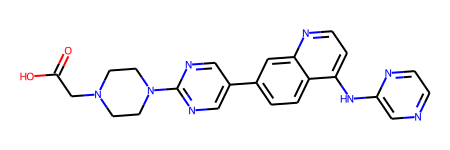

Time usage: 1.10 second

Step 1



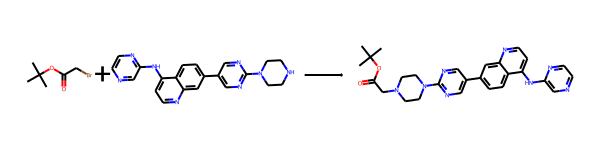

Step 2



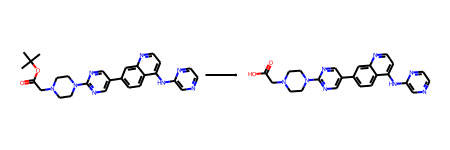

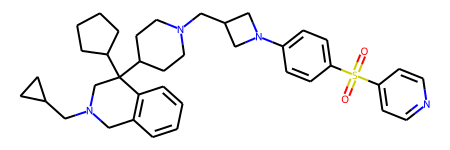

Time usage: 0.07 second

This molecule cannot generate synthesis plan




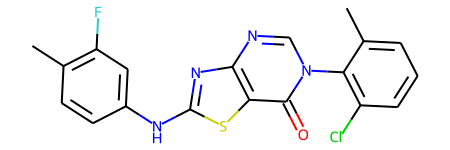

Time usage: 0.03 second

This molecule cannot generate synthesis plan




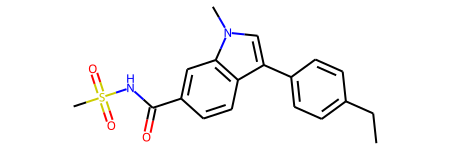

Time usage: 0.42 second

Step 1



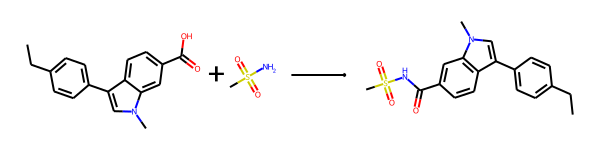

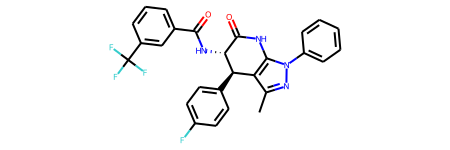

Time usage: 0.40 second

Step 1



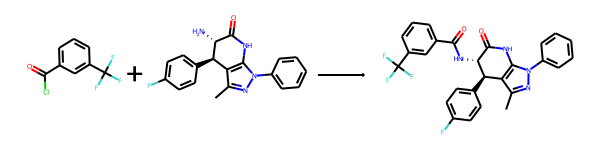

In [6]:
for data in Data:
    Retrosynthesis_MCTS(TargetMolecule=data)